In [1]:
#writing some conda package or module
#!pip install netCDF4
%matplotlib inline
import warnings
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
#!pip install cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point


In [2]:
data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/regcm driven by gcm/ensemble-average/regcmensble.nc')
 
data

<xarray.Dataset>
Dimensions:    (time: 432, bnds: 2, y: 337, x: 429)
Coordinates:
  * time       (time) object 1970-01-16 12:00:00 ... 2005-12-16 12:00:00
    lon        (y, x) float64 ...
    lat        (y, x) float64 ...
  * x          (x) float64 -5.35e+06 -5.325e+06 -5.3e+06 ... 5.325e+06 5.35e+06
  * y          (y) float64 -4.2e+06 -4.175e+06 -4.15e+06 ... 4.175e+06 4.2e+06
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    crs        |S1 ...
    pr         (time, y, x) float32 ...
Attributes: (12/165)
    CDI:                                             Climate Data Interface v...
    Conventions:                                     CF-1.7
    history:                                         Thu Jul 21 14:08:02 2022...
    source:                                          RegCM Model output file
    institution:                                     Oak Ridge National Labor...
    project_id:                                      CORDEX
    ...                                              ...
    experiment_id:                                   historical
    driving_experiment:                              MIROC-MIROC5, historical...
    driving_model_id:                                MIROC-MIROC5
    driving_experiment_name:                         historical
    model_id:                                        ICTP-RegCM4-7
    CDO:                                             Climate Data Operators v...

In [3]:
#changing time dim to datetime64[ns] dtype

datetimeindex = data.indexes['time'].to_datetimeindex()
data['time']=datetimeindex
data

/home/mkibria/miniconda3/envs/esp-sp/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]
/tmp/ipykernel_29760/1463838701.py:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = data.indexes['time'].to_datetimeindex()


<xarray.Dataset>
Dimensions:    (time: 432, bnds: 2, y: 337, x: 429)
Coordinates:
  * time       (time) datetime64[ns] 1970-01-16T12:00:00 ... 2005-12-16T12:00:00
    lon        (y, x) float64 ...
    lat        (y, x) float64 ...
  * x          (x) float64 -5.35e+06 -5.325e+06 -5.3e+06 ... 5.325e+06 5.35e+06
  * y          (y) float64 -4.2e+06 -4.175e+06 -4.15e+06 ... 4.175e+06 4.2e+06
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1970-01-01 00:00:00 ... 2006-01-01 00:00:00
    crs        |S1 b''
    pr         (time, y, x) float32 ...
Attributes: (12/165)
    CDI:                                             Climate Data Interface v...
    Conventions:                                     CF-1.7
    history:                                         Thu Jul 21 14:08:02 2022...
    source:                                          RegCM Model output file
    institution:                                     Oak Ridge National Labor...
    project_id:                                      CORDEX
    ...                                              ...
    experiment_id:                                   historical
    driving_experiment:                              MIROC-MIROC5, historical...
    driving_model_id:                                MIROC-MIROC5
    driving_experiment_name:                         historical
    model_id:                                        ICTP-RegCM4-7
    CDO:                                             Climate Data Operators v...

In [4]:
#to select the year from 1980 to 2015
data = data.sel(time=slice('1980-01-16T12:00:00.000000000','2005-12-16T00:00:00.000000000'))
data

<xarray.Dataset>
Dimensions:    (time: 311, bnds: 2, y: 337, x: 429)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-16T12:00:00 ... 2005-11-16
    lon        (y, x) float64 ...
    lat        (y, x) float64 ...
  * x          (x) float64 -5.35e+06 -5.325e+06 -5.3e+06 ... 5.325e+06 5.35e+06
  * y          (y) float64 -4.2e+06 -4.175e+06 -4.15e+06 ... 4.175e+06 4.2e+06
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1980-01-01 00:00:00 ... 2005-12-01 00:00:00
    crs        |S1 b''
    pr         (time, y, x) float32 ...
Attributes: (12/165)
    CDI:                                             Climate Data Interface v...
    Conventions:                                     CF-1.7
    history:                                         Thu Jul 21 14:08:02 2022...
    source:                                          RegCM Model output file
    institution:                                     Oak Ridge National Labor...
    project_id:                                      CORDEX
    ...                                              ...
    experiment_id:                                   historical
    driving_experiment:                              MIROC-MIROC5, historical...
    driving_model_id:                                MIROC-MIROC5
    driving_experiment_name:                         historical
    model_id:                                        ICTP-RegCM4-7
    CDO:                                             Climate Data Operators v...

In [5]:
#selecting only JJAS months

def is_jjas(month):
    return (month >= 6) & (month <= 9)

jjas_data = data.sel(time=is_jjas(data['time.month']))

jjas_data

<xarray.Dataset>
Dimensions:    (time: 104, bnds: 2, y: 337, x: 429)
Coordinates:
  * time       (time) datetime64[ns] 1980-06-16 ... 2005-09-16
    lon        (y, x) float64 ...
    lat        (y, x) float64 ...
  * x          (x) float64 -5.35e+06 -5.325e+06 -5.3e+06 ... 5.325e+06 5.35e+06
  * y          (y) float64 -4.2e+06 -4.175e+06 -4.15e+06 ... 4.175e+06 4.2e+06
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1980-06-01 00:00:00 ... 2005-10-01 00:00:00
    crs        |S1 b''
    pr         (time, y, x) float32 ...
Attributes: (12/165)
    CDI:                                             Climate Data Interface v...
    Conventions:                                     CF-1.7
    history:                                         Thu Jul 21 14:08:02 2022...
    source:                                          RegCM Model output file
    institution:                                     Oak Ridge National Labor...
    project_id:                                      CORDEX
    ...                                              ...
    experiment_id:                                   historical
    driving_experiment:                              MIROC-MIROC5, historical...
    driving_model_id:                                MIROC-MIROC5
    driving_experiment_name:                         historical
    model_id:                                        ICTP-RegCM4-7
    CDO:                                             Climate Data Operators v...

In [6]:
#data["pr"]["x"][379:429].values
#data["pr"]["y"][237:337].values
#data["pr"]["time"].values
#jjas_data["pr"]["lat"][:].values

#jjas_data["pr"]["lon"][:].values


#data["pr"]["x"].values

#data.x

In [7]:
#data["pr"]["y"][287:337].values

In [8]:
#to select the x and y coordinates
#jjas_data = jjas_data.sel(x=slice(4125000.,5350000.),y=slice(2975000.,4200000.))
#jjas_data

In [9]:
#getting the mean for JJAS data
jjas_mean = jjas_data.pr.mean('time')
 
jjas_mean 

<xarray.DataArray 'pr' (y: 337, x: 429)>
array([[7.0653688e-05, 6.4666419e-05, 6.4611646e-05, ..., 8.0376034e-05,
        7.5220414e-05, 7.2200040e-05],
       [6.2068291e-05, 5.0763465e-05, 5.0490988e-05, ..., 6.2688734e-05,
        6.0327369e-05, 6.4345862e-05],
       [6.2511390e-05, 4.7701513e-05, 4.1676311e-05, ..., 5.3478223e-05,
        5.5975081e-05, 6.1404848e-05],
       ...,
       [2.3735555e-04, 1.4522087e-04, 9.3012932e-05, ..., 2.2747819e-04,
        2.8940963e-04, 4.1488296e-04],
       [2.6957813e-04, 1.5012221e-04, 1.0815492e-04, ..., 2.6823962e-04,
        3.1088514e-04, 4.3101868e-04],
       [2.9982597e-04, 2.2279457e-04, 1.4082120e-04, ..., 3.7230973e-04,
        4.1399180e-04, 4.9346447e-04]], dtype=float32)
Coordinates:
    lon      (y, x) float64 ...
    lat      (y, x) float64 ...
  * x        (x) float64 -5.35e+06 -5.325e+06 -5.3e+06 ... 5.325e+06 5.35e+06
  * y        (y) float64 -4.2e+06 -4.175e+06 -4.15e+06 ... 4.175e+06 4.2e+06

The pr is given in kg m $^{-2}$  s $^{-1}$ so we have to convert it into mm/day.

The formula is 1 kgm$^{-2}$ s$^{-1}$  = 86400 mm/day. 

so we have to divide pr value by 86400

 

In [10]:
pr_mm = jjas_mean*86400
pr_mm

<xarray.DataArray 'pr' (y: 337, x: 429)>
array([[ 6.10447868,  5.58717863,  5.58244621, ...,  6.94448934,
         6.49904378,  6.23808349],
       [ 5.36270037,  4.38596337,  4.36242133, ...,  5.41630662,
         5.21228471,  5.55948252],
       [ 5.40098408,  4.12141071,  3.60083323, ...,  4.62051847,
         4.83624696,  5.30537884],
       ...,
       [20.50751927, 12.54708292,  8.0363173 , ..., 19.65411538,
        25.00499161, 35.84588785],
       [23.29155039, 12.9705593 ,  9.34458508, ..., 23.17590276,
        26.86047591, 37.24001376],
       [25.9049641 , 19.24945051, 12.16695146, ..., 32.16756089,
        35.76889168, 42.63533   ]])
Coordinates:
    lon      (y, x) float64 ...
    lat      (y, x) float64 ...
  * x        (x) float64 -5.35e+06 -5.325e+06 -5.3e+06 ... 5.325e+06 5.35e+06
  * y        (y) float64 -4.2e+06 -4.175e+06 -4.15e+06 ... 4.175e+06 4.2e+06

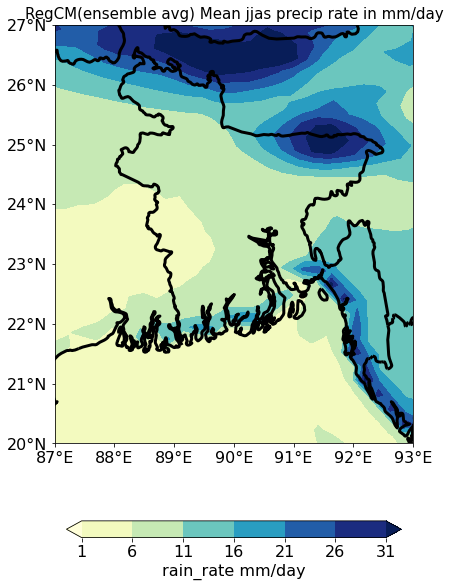

In [15]:
#plotting with cartopy jjas_pr_mean
import cartopy.feature as cfeature

plt.rcParams['font.size'] = '16'



fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


 
m1 = ax.contourf(pr_mm['lon'][:], pr_mm['lat'][:],pr_mm,
                 np.arange(1,35+1,5),transform = ccrs.PlateCarree(),cmap='YlGnBu',extend='both')




# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)




plt.colorbar(m1, orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'rain_rate mm/day')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)
 

plt.title('RegCM(ensemble avg) Mean jjas precip rate in mm/day', fontsize=15)
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/bd_pr_ensemble avg_jjas_mean.png")






Now I will plot the annual precipitation rate in mm/day

In [16]:
annual_mean = data.pr.mean('time')
annual_mean

<xarray.DataArray 'pr' (y: 337, x: 429)>
array([[2.8725085e-04, 2.5278248e-04, 2.4352437e-04, ..., 4.7964808e-05,
        4.5057950e-05, 4.4914941e-05],
       [2.5122109e-04, 1.9445388e-04, 1.8841254e-04, ..., 3.7903101e-05,
        3.7304304e-05, 4.2004605e-05],
       [2.6583381e-04, 2.1010953e-04, 1.7816284e-04, ..., 3.2981781e-05,
        3.5658657e-05, 4.1304909e-05],
       ...,
       [1.7843599e-04, 1.2925664e-04, 1.0122780e-04, ..., 9.4130461e-05,
        1.1893471e-04, 1.6912524e-04],
       [2.1266036e-04, 1.3422464e-04, 1.1666456e-04, ..., 1.0993845e-04,
        1.2713016e-04, 1.7489708e-04],
       [2.4873164e-04, 1.8612827e-04, 1.4798263e-04, ..., 1.5051625e-04,
        1.6822520e-04, 2.0075892e-04]], dtype=float32)
Coordinates:
    lon      (y, x) float64 27.41 27.61 27.81 28.01 ... 125.8 126.1 126.3 126.6
    lat      (y, x) float64 -26.13 -26.1 -26.06 -26.03 ... 43.37 43.33 43.28
  * x        (x) float64 -5.35e+06 -5.325e+06 -5.3e+06 ... 5.325e+06 5.35e+06
  * y        (y) float64 -4.2e+06 -4.175e+06 -4.15e+06 ... 4.175e+06 4.2e+06

In [17]:
#converting from kgm-2s-2 to mm/day

annual_pr_mm = annual_mean*86400
annual_pr_mm

<xarray.DataArray 'pr' (y: 337, x: 429)>
array([[24.81847331, 21.84040658, 21.04050522, ...,  4.1441594 ,
         3.89300688,  3.88065091],
       [21.70550236, 16.80081538, 16.27884326, ...,  3.2748279 ,
         3.22309186,  3.6291979 ],
       [22.96804078, 18.15346344, 15.3932692 , ...,  2.8496259 ,
         3.08090796,  3.56874416],
       ...,
       [15.41686971, 11.16777412,  8.74608199, ...,  8.1328718 ,
        10.2759589 , 14.61242074],
       [18.37385553, 11.59700886, 10.07981796, ...,  9.49868239,
        10.98404573, 15.11110794],
       [21.49041351, 16.08148213, 12.78569936, ..., 13.00460408,
        14.53465763, 17.34557077]])
Coordinates:
    lon      (y, x) float64 27.41 27.61 27.81 28.01 ... 125.8 126.1 126.3 126.6
    lat      (y, x) float64 -26.13 -26.1 -26.06 -26.03 ... 43.37 43.33 43.28
  * x        (x) float64 -5.35e+06 -5.325e+06 -5.3e+06 ... 5.325e+06 5.35e+06
  * y        (y) float64 -4.2e+06 -4.175e+06 -4.15e+06 ... 4.175e+06 4.2e+06

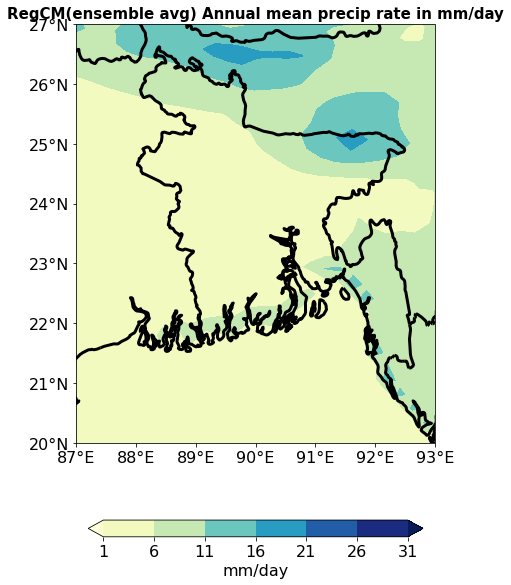

In [18]:
# Plotting annual_pr_mean

#plotting with cartopy
import cartopy.feature as cfeature


fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


m1 = ax.contourf(annual_pr_mm['lon'], annual_pr_mm['lat'],annual_pr_mm,
                 np.arange(1,35+1,5),transform = ccrs.PlateCarree(),cmap='YlGnBu',extend='both')

 
# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)


plt.colorbar(m1, orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'mm/day')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)

plt.title('RegCM(ensemble avg) Annual mean precip rate in mm/day', fontsize=15,fontweight='bold')
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/bd_pr_ensemble avg_annual_mean.png")



